In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import csv
import os
from os.path import isfile, join
import re
import h5py
import random
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from scipy import ndimage

In [12]:
#plots images whit labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len (ims)//rows + 1
    for i in range (len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [17]:
rutaEA = r'/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_EA_32_corregidos/'

archivo_EA = os.listdir(rutaEA)

array_x_EA = []
array_y_EA = []

for l in archivo_EA:
    if l != 'DATA_AUGMENTATION_EA':
    
        dataset_video_ataque = h5py.File ('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_EA_32_corregidos/'+ l)

        for line in dataset_video_ataque:

            if line[0] == 'X':
                array_x_EA.append(dataset_video_ataque[line])

            if line [0] == 'Y':
                array_y_EA.append(dataset_video_ataque[line])

/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  # This is added back by InteractiveShellApp.init_path()


In [16]:
rutaRE = r'/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_RE_32_corregidos/'

archivo_RE = os.listdir(rutaRE)

array_x_RE = []
array_y_RE = []

            
for i in archivo_RE:
    
    dataset_video_reposo = h5py.File ('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_RE_32_corregidos/'+ i)
    
    for line in dataset_video_reposo:
    
        if line[0] == 'X':
            array_x_RE.append(dataset_video_reposo[line])

        if line [0] == 'Y':
            array_y_RE.append(dataset_video_reposo[line])

/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  # This is added back by InteractiveShellApp.init_path()


In [11]:
len(array_x_RE)

78877

In [18]:
len(array_x_EA)

1780

# FLIP HORIZONTAL

In [19]:
frames_flip = []

for line in array_x_EA:
    for frame in line:
        flip=cv2.flip(frame,1)
        frames_flip.append(flip)
        
sets = [] #En esta lista vamos a separar en conjuntos de 8 los frames obtenidos anteriormente
shape_8_flip = [] #En esta lista cada conjunto de 8 frames lo convertiremos en un array de shape [8 512 512]

for i in range(0, len(frames_flip), 8): #Recorremos frame_flip, y los añadimos de 8 en 8 a sets
    sets.append(frames_flip[i:i+8])
    
for j in sets: #recorremos sets y concatenamos los 8 frames, para añadirlos a una nueva lista
    X = np.stack(j)
    shape_8_flip.append(X)
    
print(len(shape_8_flip))
print(shape_8_flip[0].shape)

1780
(8, 128, 128, 3)


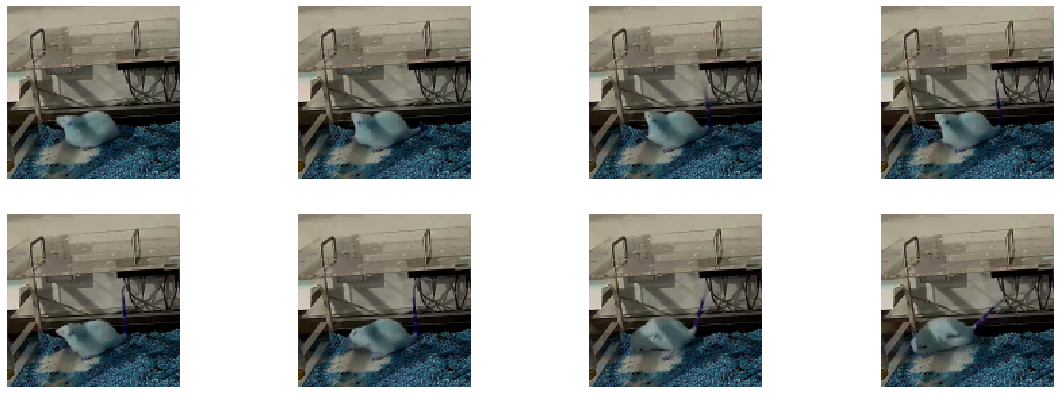

In [20]:
plots(shape_8_flip[2], figsize=(20,7), rows=2)

# COLOR BGR TO LAB

In [21]:
Color_1 = []

for line in array_x_EA:
    for frame in line:
        color=cv2.cvtColor(frame,cv2.COLOR_BGR2LAB)
        Color_1.append(color)
        
sets = [] #En esta lista vamos a separar en conjuntos de 8 los frames obtenidos anteriormente
shape_8_color = [] #En esta lista cada conjunto de 8 frames lo convertiremos en un array de shape [8 512 512]

for i in range(0, len(Color_1), 8): #Recorremos frame_flip, y los añadimos de 8 en 8 a sets
    sets.append(Color_1[i:i+8])
    
for j in sets: #recorremos sets y concatenamos los 8 frames, para añadirlos a una nueva lista
    X = np.stack(j)
    shape_8_color.append(X)
    
print(len(shape_8_color))
print(shape_8_color[0].shape)

1780
(8, 128, 128, 3)


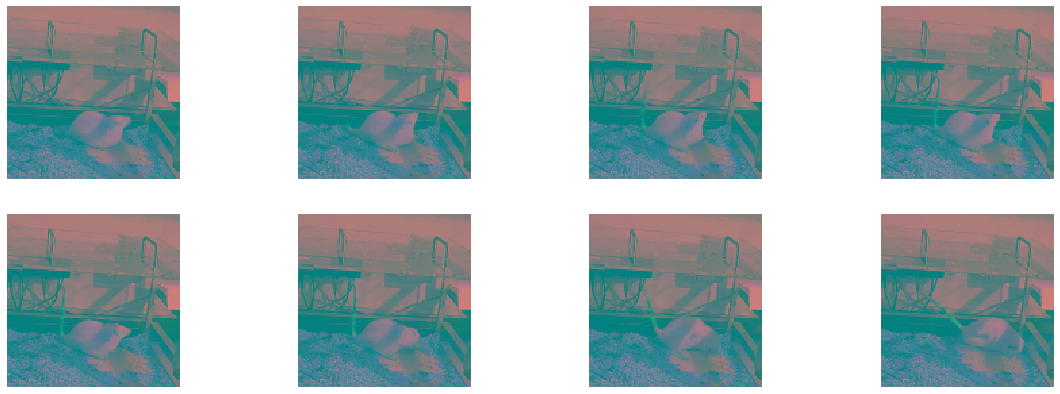

In [22]:
plots(shape_8_color[2], figsize=(20,7), rows=2)

# ROTATE 20º

In [23]:
rotate = []
for line in array_x_EA:
    for frame in line:
        rot=ndimage.rotate(frame,20)
        resize = cv2.resize(rot, (128,128), interpolation = cv2.INTER_AREA)
        rotate.append(resize)
        
sets = [] #En esta lista vamos a separar en conjuntos de 8 los frames obtenidos anteriormente
shape_8_rotate = [] #En esta lista cada conjunto de 8 frames lo convertiremos en un array de shape [8 512 512]

for i in range(0, len(rotate), 8): #Recorremos frame_flip, y los añadimos de 8 en 8 a sets
    sets.append(rotate[i:i+8])
    
for j in sets: #recorremos sets y concatenamos los 8 frames, para añadirlos a una nueva lista
    X = np.stack(j)
    shape_8_rotate.append(X)
    
print(len(shape_8_rotate))
print(shape_8_rotate[0].shape)

1780
(8, 128, 128, 3)


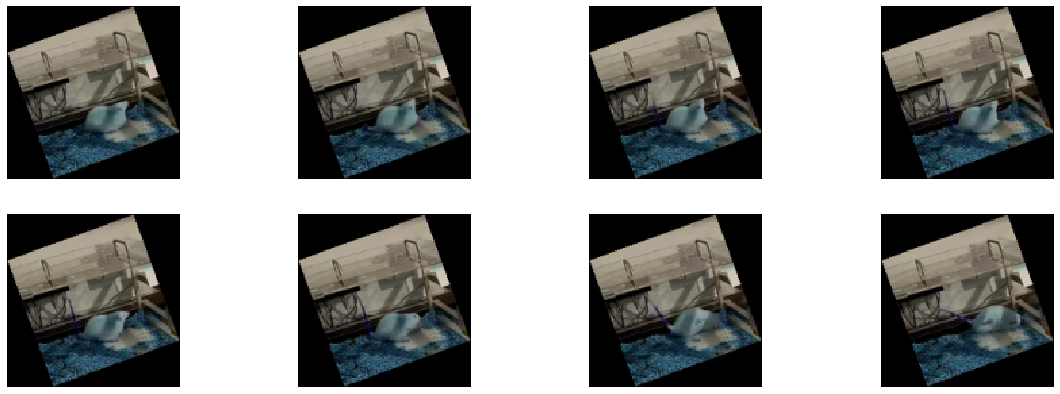

In [24]:
plots(shape_8_rotate[2], figsize=(20,7), rows=2)

# ROTATE 45º

In [25]:
rotate_45 = []
for line in array_x_EA:
    for frame in line:
        rot=ndimage.rotate(frame,45)
        resize = cv2.resize(rot, (128,128), interpolation = cv2.INTER_AREA)
        rotate_45.append(resize)
        
sets = [] #En esta lista vamos a separar en conjuntos de 8 los frames obtenidos anteriormente
shape_8_rotate_45 = [] #En esta lista cada conjunto de 8 frames lo convertiremos en un array de shape [8 512 512]

for i in range(0, len(rotate_45), 8): #Recorremos frame_flip, y los añadimos de 8 en 8 a sets
    sets.append(rotate_45[i:i+8])
    
for j in sets: #recorremos sets y concatenamos los 8 frames, para añadirlos a una nueva lista
    X = np.stack(j)
    shape_8_rotate_45.append(X)
    
print(len(shape_8_rotate_45))
print(shape_8_rotate_45[0].shape)

1780
(8, 128, 128, 3)


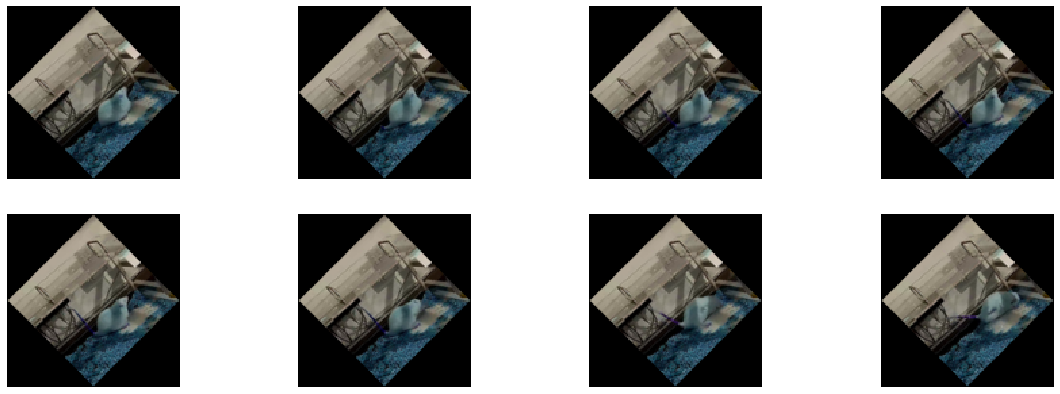

In [26]:
plots(shape_8_rotate_45[2], figsize=(20,7), rows=2)

# ROTATE -20º

In [27]:
rotate_least20 = []
for line in array_x_EA:
    for frame in line:
        rot=ndimage.rotate(frame,-20)
        resize = cv2.resize(rot, (128,128), interpolation = cv2.INTER_AREA)
        rotate_least20.append(resize)
        
sets = [] #En esta lista vamos a separar en conjuntos de 8 los frames obtenidos anteriormente
shape_8_rotate_least20 = [] #En esta lista cada conjunto de 8 frames lo convertiremos en un array de shape [8 512 512]

for i in range(0, len(rotate_least20), 8): #Recorremos frame_flip, y los añadimos de 8 en 8 a sets
    sets.append(rotate_least20[i:i+8])
    
for j in sets: #recorremos sets y concatenamos los 8 frames, para añadirlos a una nueva lista
    X = np.stack(j)
    shape_8_rotate_least20.append(X)

print(len(shape_8_rotate_least20))
print(shape_8_rotate_least20[0].shape)

1780
(8, 128, 128, 3)


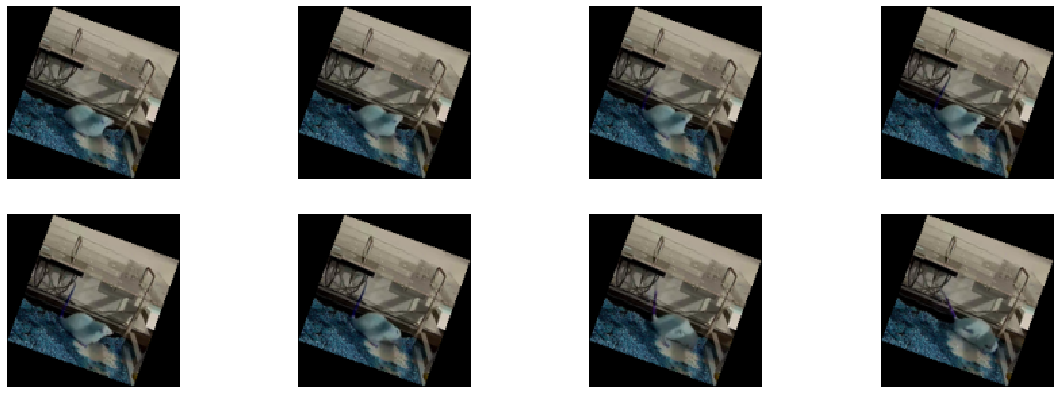

In [28]:
plots(shape_8_rotate_least20[2], figsize=(20,7), rows=2)

# ROTATE -45º

In [29]:
rotate_least45 = []
for line in array_x_EA:
    for frame in line:
        rot=ndimage.rotate(frame,-45)
        resize = cv2.resize(rot, (128,128), interpolation = cv2.INTER_AREA)
        rotate_least45.append(resize)
        
sets = [] #En esta lista vamos a separar en conjuntos de 8 los frames obtenidos anteriormente
shape_8_rotate_least45 = [] #En esta lista cada conjunto de 8 frames lo convertiremos en un array de shape [8 512 512]

for i in range(0, len(rotate_least45), 8): #Recorremos frame_flip, y los añadimos de 8 en 8 a sets
    sets.append(rotate_least45[i:i+8])
    
for j in sets: #recorremos sets y concatenamos los 8 frames, para añadirlos a una nueva lista
    X = np.stack(j)
    shape_8_rotate_least45.append(X)
    
print(len(shape_8_rotate_least45))
print(shape_8_rotate_least45[0].shape)

1780
(8, 128, 128, 3)


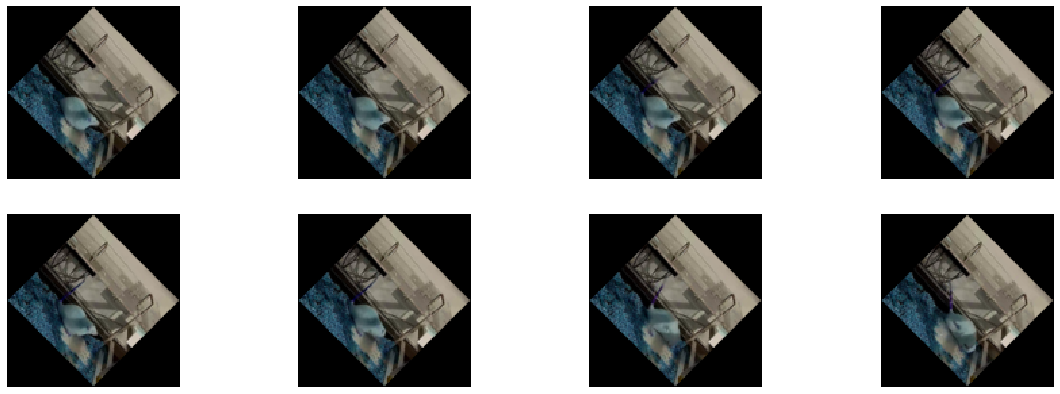

In [30]:
plots(shape_8_rotate_least45[2], figsize=(20,7), rows=2)

# BRILLO

In [31]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)



gamma = 5                                   # cambiando el valor de gamma, cambiamos el brillo

brillo = []
for line in array_x_EA:
    for frame in line:
        adjusted = adjust_gamma(frame, gamma=gamma)
        brillo.append(adjusted)
        
sets = [] #En esta lista vamos a separar en conjuntos de 8 los frames obtenidos anteriormente
shape_8_brillo = [] #En esta lista cada conjunto de 8 frames lo convertiremos en un array de shape [8 512 512]

for i in range(0, len(brillo), 8): #Recorremos frame_flip, y los añadimos de 8 en 8 a sets
    sets.append(brillo[i:i+8])
    
for j in sets: #recorremos sets y concatenamos los 8 frames, para añadirlos a una nueva lista
    X = np.stack(j)
    shape_8_brillo.append(X)

print(len(shape_8_brillo))
print(shape_8_brillo[0].shape)

1780
(8, 128, 128, 3)


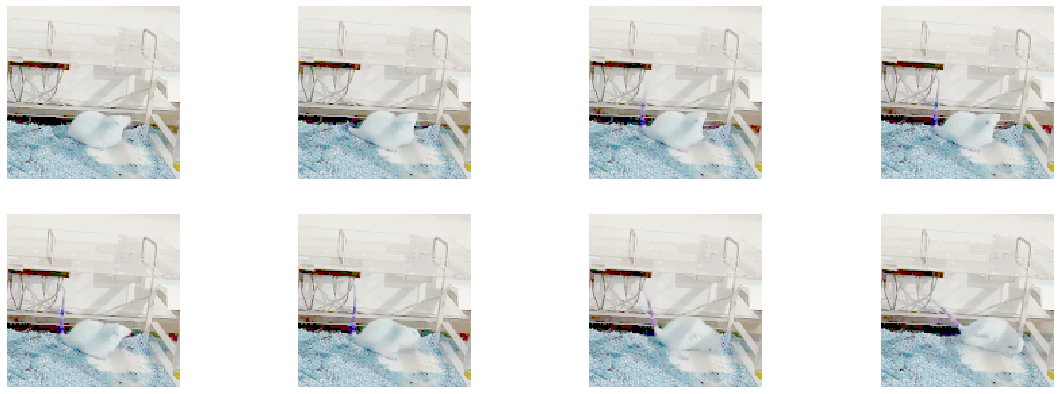

In [32]:
plots(shape_8_brillo[2], figsize=(20,7), rows=2)

# Median Blur

In [33]:
median_blur = []
for line in array_x_EA:
    for frame in line:
        blur = cv2.medianBlur(frame,5)
        median_blur.append(blur)
        
sets = [] #En esta lista vamos a separar en conjuntos de 8 los frames obtenidos anteriormente
shape_8_blur = [] #En esta lista cada conjunto de 8 frames lo convertiremos en un array de shape [8 512 512]

for i in range(0, len(median_blur), 8): #Recorremos frame_flip, y los añadimos de 8 en 8 a sets
    sets.append(median_blur[i:i+8])
    
for j in sets: #recorremos sets y concatenamos los 8 frames, para añadirlos a una nueva lista
    X = np.stack(j)
    shape_8_blur.append(X)
    
print(len(shape_8_blur))
print(shape_8_blur[0].shape)

1780
(8, 128, 128, 3)


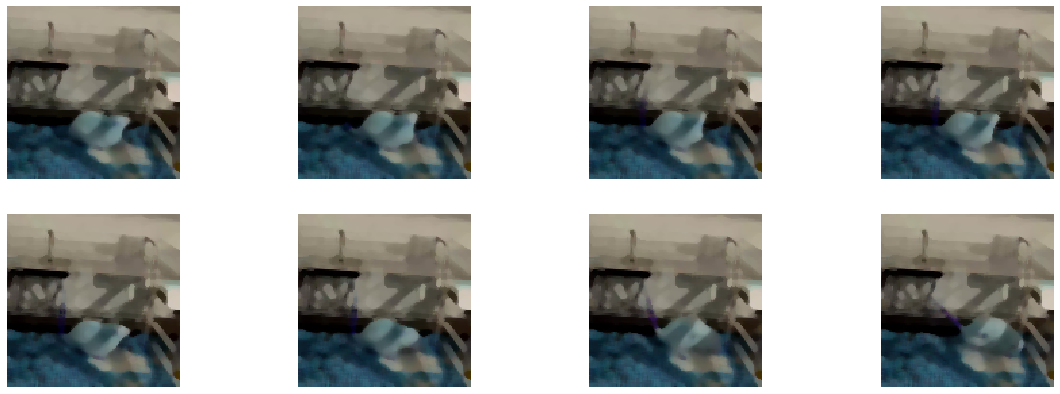

In [34]:
plots(shape_8_blur[2], figsize=(20,7), rows=2)

In [3]:
plots(array_x_EA[2], figsize=(20,7), rows=2)

NameError: name 'plots' is not defined

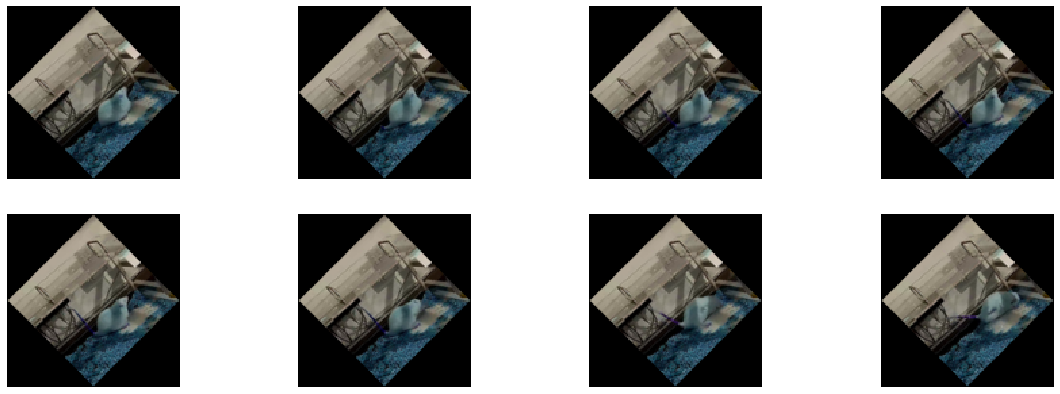

In [9]:
plots(shape_8_rotate_45[2], figsize=(20,7), rows=2)

In [27]:
todos_np = shape_8_flip + shape_8_color + shape_8_rotate + shape_8_rotate_45 + shape_8_rotate_least20 + shape_8_rotate_least45 + shape_8_brillo + shape_8_blur 
print(len(todos_np))

14240


In [28]:
state = 'EA'

it = 0

with h5py.File('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_EA_32_corregidos/DATA_AUGMENTATION_EA', 'w') as h5File: #Creamos en archivo .h5
    for line in todos_np:
        it += 1
        Xset = h5File.create_dataset('X'+str(it), data= line)
        Yset = h5File.create_dataset('Y'+str(it), data = state)

# Datasets training 

In [3]:
rutaEA = r'/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_EA_32_corregidos/'
rutaRE = r'/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_RE_32_corregidos/'

archivo_EA = os.listdir(rutaEA)
archivo_RE = os.listdir(rutaRE)

array_x_EA = []
array_y_EA = []

array_x_RE = []
array_y_RE = []

for l in archivo_EA:
    
    dataset_video_ataque = h5py.File ('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_EA_32_corregidos/'+ l)
    
    for line in dataset_video_ataque:
        
        if line[0] == 'X':
            array_x_EA.append(dataset_video_ataque[line])

        if line [0] == 'Y':
            array_y_EA.append(dataset_video_ataque[line])
            
for i in archivo_RE:
    
    dataset_video_reposo = h5py.File ('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_RE_32_corregidos/'+ i)
    
    for line in dataset_video_reposo:
    
        if line[0] == 'X':
            array_x_RE.append(dataset_video_reposo[line])

        if line [0] == 'Y':
            array_y_RE.append(dataset_video_reposo[line])
            

a = list(zip(array_x_RE, array_y_RE))
random.shuffle(a)
array_x_RE, array_y_RE = zip(*a)


array_x = array_x_EA + list(array_x_RE[:len(array_x_EA)])
array_y = array_y_EA + list(array_y_RE[:len(array_x_EA)])

b = list(zip(array_x, array_y))
random.shuffle(b)
array_x, array_y = zip(*b)

array_x_training = array_x[0:int(0.6*(len(array_x)))]
array_y_training = array_y[0:int(0.6*(len(array_y)))]

c = list(zip(array_x_training, array_y_training))
random.shuffle(c)
array_x_training, array_y_training = zip(*c)

array_x_validation = array_x[int(0.6*(len(array_x))):int(0.8*(len(array_x)))]
array_y_validation = array_y[int(0.6*(len(array_y))):int(0.8*(len(array_x)))]

d = list(zip(array_x_validation, array_y_validation))
random.shuffle(d)
array_x_validation, array_y_validation = zip(*d)

array_x_test = array_x[int(0.8*(len(array_x))):len(array_x)]
array_y_test = array_y[int(0.8*(len(array_y))):len(array_y)]

e = list(zip(array_x_test, array_y_test))
random.shuffle(e)
array_x_test, array_y_test = zip(*e)

with h5py.File('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_corregidos_training/Combinado_training_corregido_augmentation_2', 'w') as h5File:
    
    contador = 1
    for line in array_x_training:
        Xset = h5File.create_dataset('X' + str(contador), data= line.value)
        contador += 1
        
    contador = 1    
    for line in array_y_training:
        Yset = h5File.create_dataset('Y' + str(contador), data= line.value)
        contador += 1
        
with h5py.File('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_corregidos_training/Combinado_validation_corregido_augmentation_2', 'w') as h5File:
    
    contador = 1
    for line in array_x_validation:
        Xset = h5File.create_dataset('X' + str(contador), data= line.value)
        contador += 1
        
    contador = 1
    for line in array_y_validation:
        Yset = h5File.create_dataset('Y' + str(contador), data= line.value)
        contador += 1
        
with h5py.File('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_corregidos_training/Combinado_test_corregido_augmentation_2', 'w') as h5File:
    
    contador = 1
    for line in array_x_test:
        Xset = h5File.create_dataset('X' + str(contador), data= line.value)
        contador += 1
        
    contador = 1
    for line in array_y_test:
        Yset = h5File.create_dataset('Y' + str(contador), data= line.value)
        contador += 1

/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  from ipykernel import kernelapp as app
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/p

El numero total de ejemplos es: 32040(60% Training, 20% Validation y 20% Test)


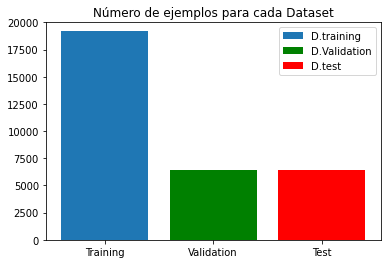

In [30]:
print('El numero total de ejemplos es:' + ' ' + str(len(array_x)) + '(60% Training, 20% Validation y 20% Test)')

plt.bar('Training',len(array_x_training), align='center')
plt.bar('Validation',len(array_x_validation), color='g',align='center')
plt.bar('Test',len(array_x_test), color='r',align='center')
plt.title('Número de ejemplos para cada Dataset')
plt.legend(['D.training','D.Validation','D.test'])


plt.ylim(0,20000)
plt.show()
#plt.savefig('/mnt/MD1200A/lconcha/videos/256x256/Datasets_training_256/total-ejemplos-blackwhite.png', dpi = 500)

/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  from ipykernel import kernelapp as app
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/cm/shared/a

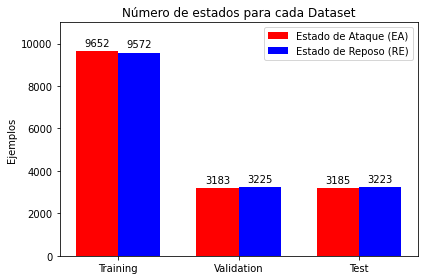

In [31]:

count_RE = 0
count_EA = 0

for i in array_y_training:
    if i.value == 'EA':
        count_EA +=1
    if i.value == 'RE':
        count_RE +=1


count_RE_v = 0
count_EA_v = 0

for i in array_y_validation:
    if i.value == 'EA':
        count_EA_v +=1
    if i.value == 'RE':
        count_RE_v +=1

count_RE_t = 0
count_EA_t = 0

for i in array_y_test:
    if i.value == 'EA':
        count_EA_t +=1
    if i.value == 'RE':
        count_RE_t +=1
        

labels = ['Training', 'Validation', 'Test']
EA = [count_EA, count_EA_v,count_EA_t]
RE = [count_RE, count_RE_v,count_RE_t]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, EA, width, color ='r', label='Estado de Ataque (EA)')
rects2 = ax.bar(x + width/2, RE, width, color ='b', label='Estado de Reposo (RE)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ejemplos')
ax.set_title('Número de estados para cada Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.ylim(0,11000)
plt.show()
#plt.savefig('/mnt/MD1200A/lconcha/videos/256x256/Datasets_training_256/ejemplosxdataset.png', dpi = 500)